In [186]:
import pandas as pd
from plotnine import *
import os

# Seattle Building Permits

In [2]:
df = pd.read_csv("Residential_Building_Permits_Issued_and_Final.csv")
df.shape

(39133, 59)

In [25]:
df.query("APTYPE=='PTS'")['COMMENTS'].sample(10)

29556    ESTABLISH USE AS SFR (20), 2 APTS (19&78) 2 TO...
37907    DEMOLISH ACCESSORY GARAGE AND STAIRS, ESTABLIS...
28778    OF EXISTING APARTMENT BUILDING AND PARKING GAR...
30767    CONSTRUCT 20 BLDGS, 2-SFR,2-APTS(B.F.),10 2-UN...
29609    DEMOLISH TWO SINGLE FAMILY RESIDENCES; ESTABLI...
27435    DEMOLISH SINGLE FAMILY RESIDENCES   ESTABLISH ...
30417    DEMOLISH EXISTING SINGLE FAMILY RESIDENCE & SH...
34125    ESTABLISH USE AS SINGLE FAMILY RESIDENCE  CONS...
35276    DEMOLISH EXISTING SINGLE FAMILY RESIDENCE ESTA...
30697    DEMOLISH EXISTING SINGLE FAMILY RESIDENCE, EST...
Name: COMMENTS, dtype: object

In [ ]:
# DWELTYPE, YEAR_ISSUED, NET_UNITS, TYPE_OCC, DEMO, YEAR_FINAL, TYPE_NAME, COMP_PLAN_TYPE

In [18]:
df_core = df[['DWELTYPE','YEAR_ISSUED','YEAR_FINAL','APTYPE','NET_UNITS','NEW','DEMO','TYPE_OCC','TYPE_NAME']].copy()
df_core.head()

,DWELTYPE,YEAR_ISSUED,YEAR_FINAL,APTYPE,NET_UNITS,NEW,DEMO,TYPE_OCC,TYPE_NAME
0,"Accessory Dwelling, Attached",2010,2017.0,Construction Permit,1.0,1,0.0,ADU,Outside Villages
1,Apartment,2018,2021.0,Construction Permit,17.0,17,0.0,MF,Urban Center
2,Detached Single-Family,2020,2021.0,Construction Permit,1.0,1,0.0,SF,Outside Villages
3,Detached Single-Family,2019,2021.0,Construction Permit,1.0,1,0.0,SF,Outside Villages
4,Apartment,2020,2021.0,Construction Permit,1.0,1,0.0,MF,Urban Center Village


In [50]:
df_const = df_core.query("DEMO==0")#df_core.query("APTYPE=='Construction Permit'")
df_const.head()

,DWELTYPE,YEAR_ISSUED,YEAR_FINAL,APTYPE,NET_UNITS,NEW,DEMO,TYPE_OCC,TYPE_NAME
0,"Accessory Dwelling, Attached",2010,2017.0,Construction Permit,1.0,1,0.0,ADU,Outside Villages
1,Apartment,2018,2021.0,Construction Permit,17.0,17,0.0,MF,Urban Center
2,Detached Single-Family,2020,2021.0,Construction Permit,1.0,1,0.0,SF,Outside Villages
3,Detached Single-Family,2019,2021.0,Construction Permit,1.0,1,0.0,SF,Outside Villages
4,Apartment,2020,2021.0,Construction Permit,1.0,1,0.0,MF,Urban Center Village


In [20]:
# Not sure what to do about some of these, whether to include or not
df_core['APTYPE'].value_counts()

Construction Permit      20631
PTS                      12395
Demolition Permit         5726
PTS PERMIT                 288
Phased Project Permit       93
Name: APTYPE, dtype: int64

In [59]:
df_const['NEW'].value_counts().sort_index().head(25)

1     20005
2      4246
3      1680
4      1048
5       395
6       339
7       168
8       165
9        58
10       47
11       16
12       67
13       16
14       23
15       25
16       26
17       10
18       31
19       11
20       38
21       17
22       18
23       15
24       25
25       14
Name: NEW, dtype: int64

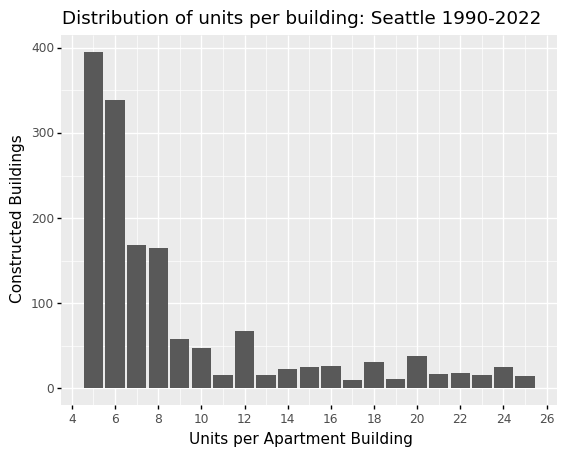

<ggplot: (8763009672777)>

In [141]:
sea_unit_count_freqs = pd.DataFrame(df_const['NEW'].value_counts().sort_index()).reset_index()
sea_unit_count_freqs.columns = ['units','buildings']
(ggplot(sea_unit_count_freqs.query('units<26&units>4'),aes(x='units',y='buildings')) + 
geom_bar(stat='identity') +
scale_x_continuous(breaks=list(range(0,30,2))) +
labs(x='Units per Apartment Building',y='Constructed Buildings',
    title = 'Distribution of units per building: Seattle 1990-2022'))

<AxesSubplot:>

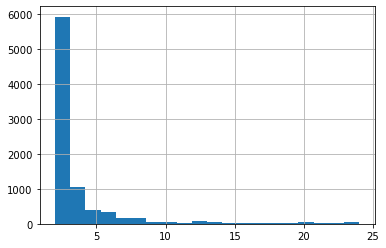

In [54]:
df_const.query('NEW<25&NEW>1')['NEW'].hist(bins=20)

# All WA Addresses

seems like the list of addresses is pretty comprehensive but the unit number is often missing, even for multi-family buildings

Note that the version I have is from Kaggle so it's 5 years old, would need to download from OpenAddresses directly to get more up-to-date data

In [60]:
df_wa_addresses = pd.read_csv("us_west_addresses/wa.csv")
print(df_wa_addresses.shape)
df_wa_addresses.head()

<ipython-input-60-2994c239fef1>:1: DtypeWarning: Columns (2,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wa_addresses = pd.read_csv("us_west_addresses/wa.csv")


,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,-122.343150,48.921103,104,W 1ST ST,NaN,Everson,NaN,NaN,98247.0,68067-104,099481794ac3dde8
1,-122.343216,48.922204,109,W 3RD ST,NaN,Everson,NaN,NaN,98247.0,68068-109,54612c811cb65927
2,-122.356505,48.907260,402,ARROWHEAD LN,NaN,Everson,NaN,NaN,98247.0,68003-402,bbec16441496508e
3,-122.338338,48.919275,108,BLAIR DR,NaN,Everson,NaN,NaN,98247.0,68008-108,e5ed7dabafdf1186
4,-122.338211,48.918561,112,BLAIR DR,NaN,Everson,NaN,NaN,98247.0,68008-112,47da212d3253bb8c


In [62]:
df_wa_apts = df_wa_addresses[df_wa_addresses['UNIT'].notna()].copy()
print(df_wa_apts.shape)

(68450, 11)


In [63]:
df_wa_apts.head()

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
5725,-122.628907,48.744813,2835,LUMMI SHORE RD,2,Bellingham,NaN,NaN,98226.0,70055-2835-2,e0248c42fdfd0982
5928,-122.613314,48.789606,4087,LUMMI SHORE DR,A,Bellingham,NaN,NaN,98226.0,70054-4087-A,fa2b905511aa828a
6028,-122.645561,48.724376,2289,LUMMI SHORE RD,A,Bellingham,NaN,NaN,98226.0,70055-2289-A,2409114f263cceb6
6563,-122.617272,48.794149,2608,KWINA RD,B,Bellingham,NaN,NaN,98226.0,70042-2608-B,512a418147b7b749
6570,-122.635830,48.794039,2828,KWINA RD,A,Bellingham,NaN,NaN,98226.0,70042-2828-A,12a965521ecaf396


In [82]:
df_wa_unit_counts = df_wa_apts.drop_duplicates(subset=['NUMBER','STREET','CITY','POSTCODE','UNIT']).groupby(['NUMBER','STREET','CITY','POSTCODE']).size().reset_index().rename(columns={0:"n"})
print(df_wa_unit_counts.shape)
df_wa_unit_counts.head()

(2072, 5)


,NUMBER,STREET,CITY,POSTCODE,n
0,198.0,RITTER ST S,TENINO,98589,1
1,200,LILLY RD NE,OLYMPIA,98506,3
2,205.0,LILLY RD NE,OLYMPIA,98506,1
3,208,LEE ST SW,TUMWATER,98501,2
4,220,ISRAEL AVE SW,TUMWATER,98501,1


In [73]:
df_wa_unit_counts['n'].value_counts().sort_index().head(25)

1     972
2     413
3     150
4     140
5      45
6      51
7      44
8      42
9      22
10     18
11     10
12     29
13      5
14      9
15     12
16      8
17      4
18     11
19      7
20      3
21      2
22      2
23      1
24      9
25      3
Name: n, dtype: int64

# CA Addresses

In [74]:
df_ca_addresses = pd.read_csv("us_west_addresses/ca.csv",usecols=['NUMBER','STREET','CITY','POSTCODE','UNIT'])
print(df_ca_addresses.shape)
df_ca_addresses.head()

<ipython-input-74-49866aad335a>:1: DtypeWarning: Columns (2,3,4,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ca_addresses = pd.read_csv("us_west_addresses/ca.csv",usecols=['NUMBER','STREET','CITY','POSTCODE','UNIT'])


(13784513, 5)


,NUMBER,STREET,UNIT,CITY,POSTCODE
0,988.0,FRANKLIN ST,508,OAKLAND,94607
1,988.0,FRANKLIN ST,1301,OAKLAND,94607
2,988.0,FRANKLIN ST,1302,OAKLAND,94607
3,988.0,FRANKLIN ST,507,OAKLAND,94607
4,928.0,FRANKLIN ST,522,OAKLAND,94607


In [124]:
df_ca_apts = df_ca_addresses[df_ca_addresses['UNIT'].notna()].copy()
df_ca_apts.loc[df_ca_apts['POSTCODE'].isna(),'POSTCODE'] = '00000'
print(df_ca_apts.shape)

(1234744, 5)


In [125]:
df_ca_unit_counts = df_ca_apts.drop_duplicates(subset=['NUMBER','STREET','CITY','POSTCODE','UNIT']).groupby(['NUMBER','STREET','CITY','POSTCODE']).size().reset_index().rename(columns={0:"n"})
print(df_ca_unit_counts.shape)
df_ca_unit_counts.head()

(164072, 5)


,NUMBER,STREET,CITY,POSTCODE,n
0,0,MINNEHAHA,PALM SPRINGS,92264.0,1
1,0,WILTSE RD,CITY OF PLACERVILLE,00000,1
2,1.0,3RD ST,SAN RAFAEL,94901,1
3,1.0,ACTON CI,BERKELEY,94702,1
4,1.0,ALVINA AVE,SAN RAFAEL,94901,1


In [126]:
ca_unit_count_freqs = pd.DataFrame(df_ca_unit_counts['n'].value_counts().sort_index()).reset_index()
ca_unit_count_freqs.columns = ['units','buildings']
ca_unit_count_freqs.head(25)

,units,buildings
0,1,68373
1,2,20496
2,3,11879
3,4,17899
4,5,6381
5,6,7048
6,7,3664
7,8,6731
8,9,2224
9,10,2448


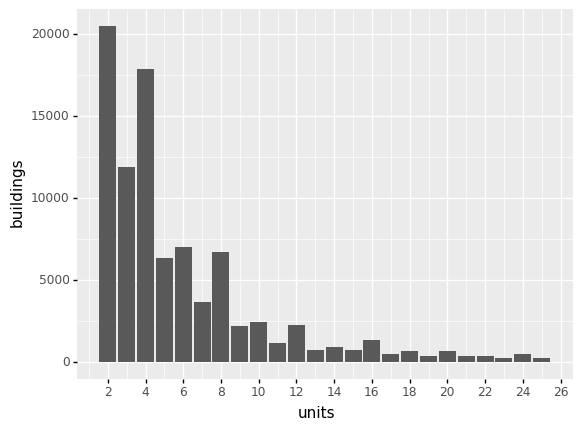

<ggplot: (8762927136127)>

In [127]:
(ggplot(ca_unit_count_freqs.query('units<26&units>1'),aes(x='units',y='buildings')) + 
geom_bar(stat='identity') +
scale_x_continuous(breaks=list(range(0,30,2))))

In [98]:
# Analyze by municipality to check for differences
# Seems like some municipalities over/under-represented in how often they have unit data, or any housing data

In [128]:
def plot_hist_by_muni(muni,df=df_ca_apts):
    data = df.query('CITY==@muni')
    df_unit_counts = data.groupby(['NUMBER','STREET','CITY','POSTCODE']).size().reset_index().rename(columns={0:"n"})
    unit_count_freqs = pd.DataFrame(df_unit_counts['n'].value_counts().sort_index()).reset_index()
    unit_count_freqs.columns = ['units','buildings']
    hist = (ggplot(unit_count_freqs.query('units<30&units>1'),aes(x='units',y='buildings')) + 
        geom_bar(stat='identity') +
        scale_x_continuous(breaks=list(range(0,30,2))))
    return(hist)
df_ca_apts['CITY'].value_counts().head(15)

Long Beach            88475
San Diego             47019
Glendale              45206
BAKERSFIELD           44744
ANAHEIM               43899
Pasadena              30999
BERKELEY              28340
Salinas               25022
SAN RAFAEL            23940
Mountain View         21704
CHICO                 21629
FREMONT               21002
City of Santa Rosa    19288
SAN JOSE              17147
Mammoth Lakes City    14559
Name: CITY, dtype: int64

In [129]:
df_ca_addresses['CITY'].value_counts().head(10)

Los Angeles    644270
San Diego      347282
SAN JOSE       246329
BAKERSFIELD    211834
Long Beach     210802
ANAHEIM        171338
OAKLAND        109006
VISALIA        101026
FREMONT         89175
BERKELEY        87394
Name: CITY, dtype: int64

In [130]:
top_ca_apt_cities = df_ca_apts['CITY'].value_counts().head(10).index
top_ca_apt_cities

Index(['Long Beach', 'San Diego', 'Glendale', 'BAKERSFIELD', 'ANAHEIM',
       'Pasadena', 'BERKELEY', 'Salinas', 'SAN RAFAEL', 'Mountain View'],
      dtype='object')

Long Beach


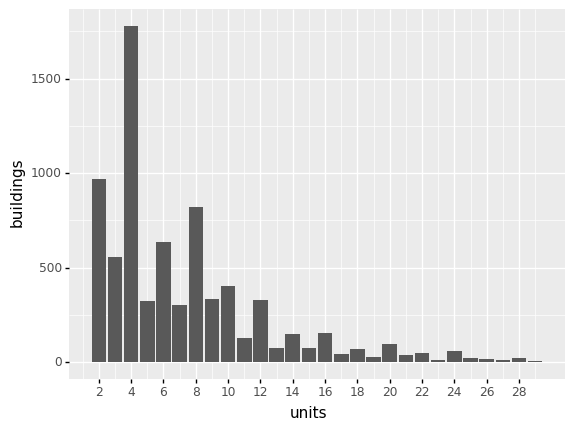

<ggplot: (8763009639364)>
San Diego


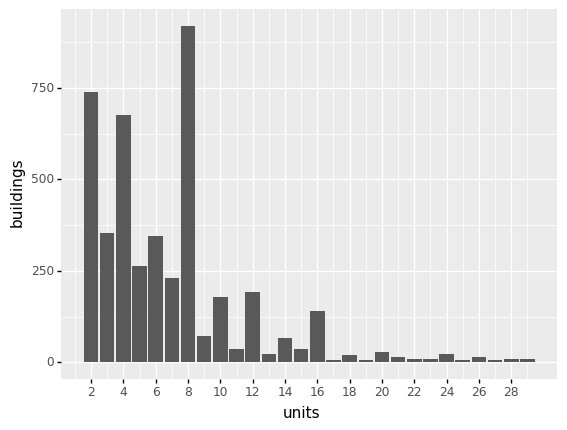

<ggplot: (8763009639406)>
Glendale


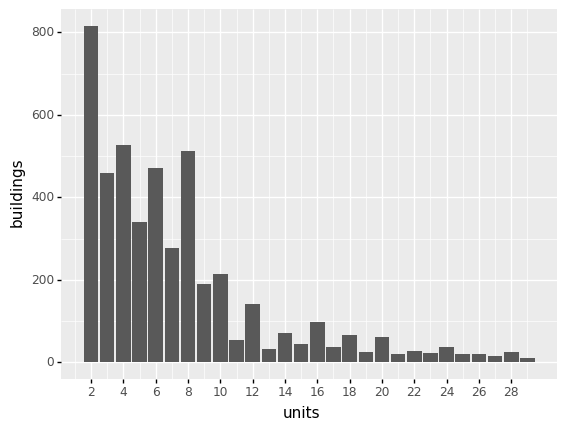

<ggplot: (8762930720877)>
BAKERSFIELD


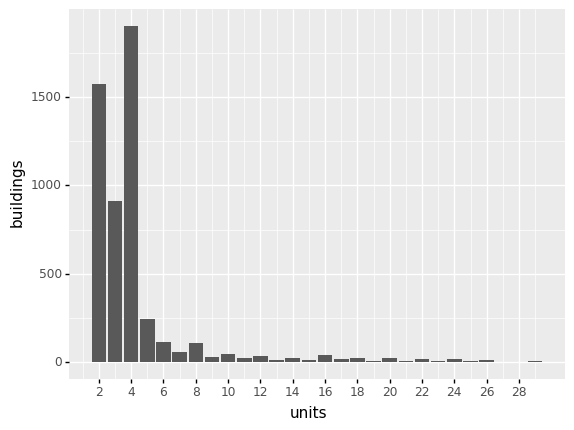

<ggplot: (8762926885000)>
ANAHEIM


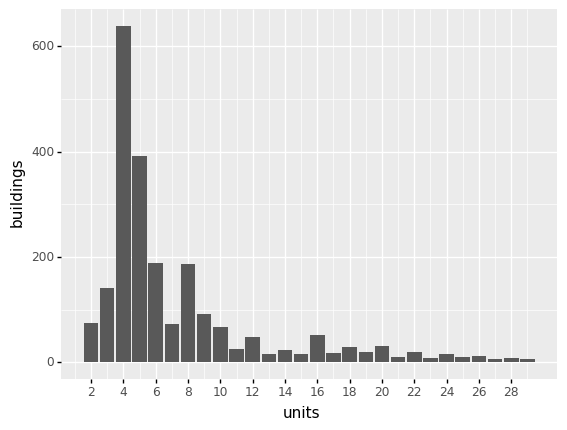

<ggplot: (8763009672506)>
Pasadena


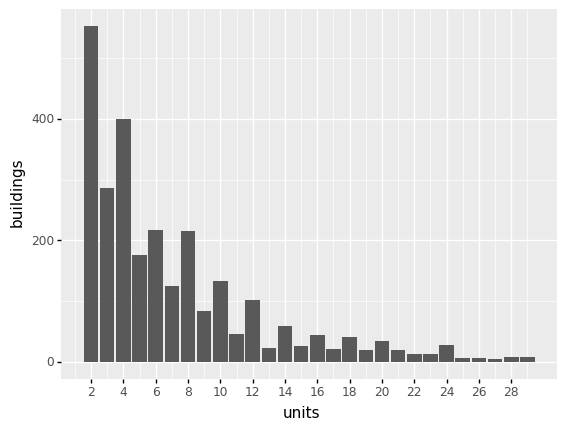

<ggplot: (8762930751883)>
BERKELEY


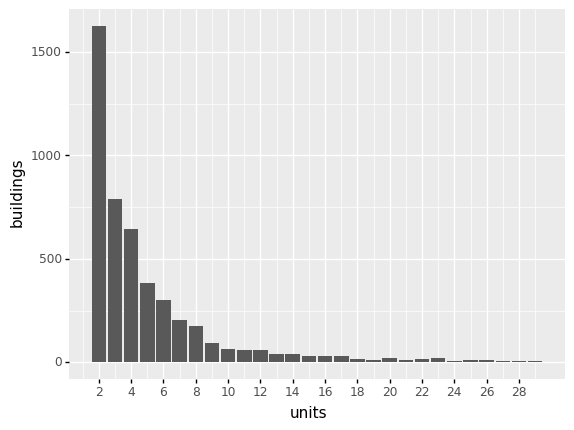

<ggplot: (8762927138139)>
Salinas


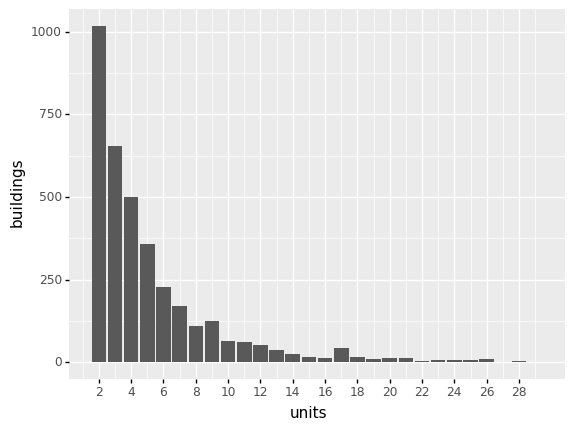

<ggplot: (8763009580057)>
SAN RAFAEL


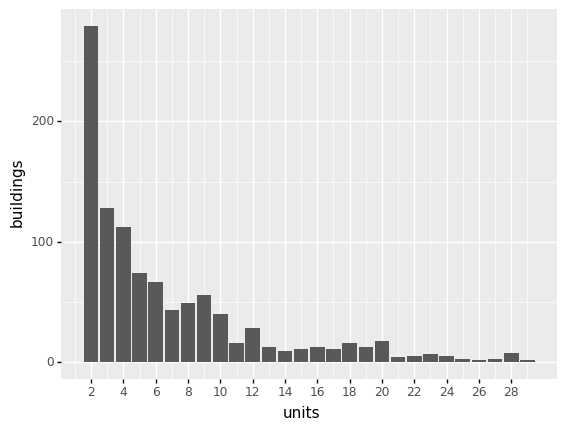

<ggplot: (8762925448620)>
Mountain View


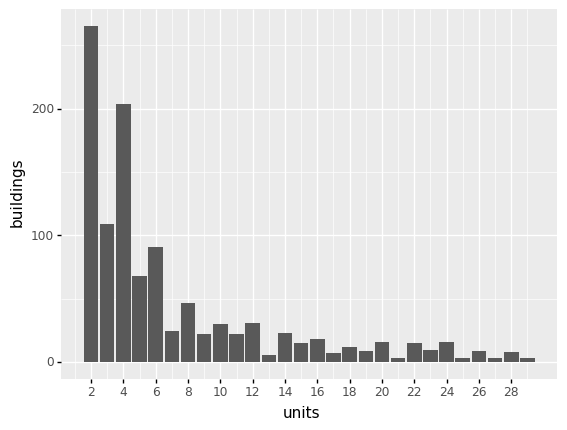

<ggplot: (8763012542492)>


In [133]:
for x in top_ca_apt_cities:
    print(x)
    print(plot_hist_by_muni(x))

# Newer OpenAddresses Data

In [162]:
# No unit info
df_king_raw = pd.read_json("us_west_addresses_new/wa/king-addresses-county.geojson",lines=True)
print(df_king_raw.shape)
df_king_raw.head()

(668481, 3)


,type,properties,geometry
0,Feature,"{'hash': 'e8605a496593386e', 'number': '119', ...","{'type': 'Point', 'coordinates': [-122.3580529..."
1,Feature,"{'hash': '87d28792bee6b164', 'number': '115', ...","{'type': 'Point', 'coordinates': [-122.3578935..."
2,Feature,"{'hash': 'af2f17dad9761ff9', 'number': '111', ...","{'type': 'Point', 'coordinates': [-122.3577311..."
3,Feature,"{'hash': '5574f291b1685a8c', 'number': '4015',...","{'type': 'Point', 'coordinates': [-122.357475,..."
4,Feature,"{'hash': 'e30d2a2dea89cbae', 'number': '4017',...","{'type': 'Point', 'coordinates': [-122.3574725..."


In [173]:
df_pierce_raw = pd.read_json("us_west_addresses_new/wa/pierce-addresses-county.geojson",lines=True)
print(df_pierce_raw.shape)
df_pierce_raw.head()

(400002, 3)


,type,properties,geometry
0,Feature,"{'hash': 'd265fea1a509a250', 'number': '611', ...","{'type': 'Point', 'coordinates': [-122.608996,..."
1,Feature,"{'hash': '162121c92fb93040', 'number': '306', ...","{'type': 'Point', 'coordinates': [-122.6082999..."
2,Feature,"{'hash': 'e3a3493c55ef7ec7', 'number': '207', ...","{'type': 'Point', 'coordinates': [-122.6089675..."
3,Feature,"{'hash': 'a227bf96dbaf483b', 'number': '307', ...","{'type': 'Point', 'coordinates': [-122.6087817..."
4,Feature,"{'hash': '328d295cfcefcb43', 'number': '1310',...","{'type': 'Point', 'coordinates': [-122.600902,..."


In [174]:
df_pierce = pd.json_normalize(df_pierce_raw['properties'])
print(df_pierce.shape)
df_pierce.head()

(400002, 9)


,hash,number,street,unit,city,district,region,postcode,id
0,d265fea1a509a250,611,3RD ST,,Steilacoom,,WA,98388,
1,162121c92fb93040,306,GOVE ST,,Steilacoom,,WA,98388,
2,e3a3493c55ef7ec7,207,3RD ST,,Steilacoom,,WA,98388,
3,a227bf96dbaf483b,307,MARTIN ST,,Steilacoom,,WA,98388,
4,328d295cfcefcb43,1310,RAINIER ST,,Steilacoom,,WA,98388,


In [176]:
df_pierce_apts = df_pierce[df_pierce['unit']!=''].copy().drop(['hash','id'],axis=1)
print(df_pierce_apts.shape)
df_pierce_apts.head()

(95474, 7)


,number,street,unit,city,district,region,postcode
105,1414,COMMERCIAL ST,#8,Steilacoom,,WA,98388
128,215,WILKES ST,#104,Steilacoom,,WA,98388
157,2604,LEXINGTON ST,#1/2,Steilacoom,,WA,98388
181,2606,LEXINGTON ST,#1/2,Steilacoom,,WA,98388
269,2002,LAFAYETTE ST,#1,Steilacoom,,WA,98388


In [177]:
df_pierce_apts['city'].value_counts().head()

Tacoma              40719
Lakewood            13912
Puyallup             8353
South Hill           6259
University Place     5617
Name: city, dtype: int64

In [178]:
df_pierce_unit_counts = df_pierce_apts.drop_duplicates(subset=['number','street','city','postcode','unit']).groupby(['number','street','city','postcode']).size().reset_index().rename(columns={0:"n"})
print(df_pierce_unit_counts.shape)
df_pierce_unit_counts.head()

(10909, 5)


,number,street,city,postcode,n
0,1,BROADWAY,Tacoma,98402,61
1,1,COUNTRY CLUB DR SW,Lakewood,98498,1
2,1,N BROADWAY,Tacoma,98403,31
3,1,N STADIUM WAY,Tacoma,98403,16
4,1,ST HELENS AVE,Tacoma,98402,20


In [179]:
pierce_unit_count_freqs = pd.DataFrame(df_pierce_unit_counts['n'].value_counts().sort_index()).reset_index()
pierce_unit_count_freqs.columns = ['units','buildings']
pierce_unit_count_freqs.head(25)

,units,buildings
0,1,1853
1,2,1815
2,3,751
3,4,2330
4,5,268
5,6,832
6,7,128
7,8,646
8,9,114
9,10,217


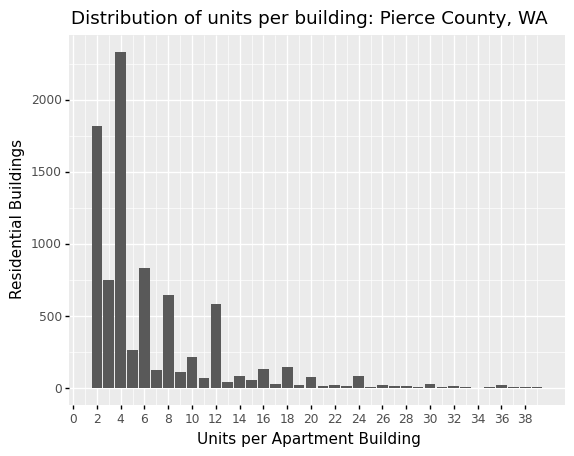

<ggplot: (8762928627854)>

In [183]:
(ggplot(pierce_unit_count_freqs.query('units<40&units>1'),aes(x='units',y='buildings')) + 
geom_bar(stat='identity') +
scale_x_continuous(breaks=list(range(0,40,2))) +
labs(x='Units per Apartment Building',y='Residential Buildings',
    title = 'Distribution of units per building: Pierce County, WA'))

In [189]:
wa_files = os.listdir("us_west_addresses_new/wa/")
wa_files = [x for x in wa_files if x.endswith("json")]
wa_files

['city_of_pasco-addresses-city.geojson',
 'garfield-addresses-county.geojson',
 'city_of_tacoma-addresses-city.geojson',
 'spokane-addresses-county.geojson',
 'walla_walla-addresses-county.geojson',
 'thurston-addresses-county.geojson',
 'city_of_bellevue-addresses-city.geojson',
 'kittitas-parcels-county.geojson',
 'city_of_richland-addresses-city.geojson',
 'snohomish_county-addresses-county.geojson',
 'clallam-parcels-county.geojson',
 'cowlitz-addresses-county.geojson',
 'skagit-parcels-county.geojson',
 'mason-addresses-county.geojson',
 'jefferson-addresses-county.geojson',
 'pacific-parcels-county.geojson',
 'spokane-parcels-county.geojson',
 'grant-addresses-county.geojson',
 'city_of_bothell-parcels-city.geojson',
 'king-addresses-county.geojson',
 'city_of_bothell-addresses-city.geojson',
 'pierce-addresses-county.geojson',
 'cowlitz-parcels-county.geojson',
 'ferry-addresses-county.geojson',
 'grays_harbor-addresses-county.geojson',
 'douglas-addresses-county.geojson',
 'cla